### CS/ECE/ISyE 524 — Introduction to Optimization — Summer 2018

# Crypto-currency Optimization Using Markowitz and MCDM methods

### Na Li, Yicheng Lin, Lichengxi Huang, Daniel Jinkyo Suh
nli37@wisc.edu, lin229@wisc.edu, lhuang236@wisc.edu, jsuh7@wisc.edu

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-Model)
  1. [Markowitz Modern Portfolio Theory](#2.A.-Markowitz-Modern-Portfolio-Theory)
  1. [Multiple-criteria decision-making](#2.B.-Multiple-criteria-decision-making)
1. [Solutions](#3.-Solutions)
1. [Results and Discussion](#4.-Results-and-Discussion)
  1. [Standard deviations and expected returns of all assets](#4.A.-Standard-deviations-and-expected-returns-of-all-assets)
  1. [Optimal porfolio examples](#4.B.-Optimal-porfolio-examples)
  1. [Tradeoff curves](#4.C.-Tradeoff-curves)
  1. [Total expected return comparasion](#4.D.-Total-expected-return-comparasion)
  1. [Accuracy of two models](#4.E.-Accuracy-of-two-models)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)
1. [Appendix](#7.-Appendix)
  1. [Crypto-currencies](#7.A.-Crypto-currencies)
  1. [Optimal portfolios for examples of two models](#7.B.-Optimal-portfolios-for-examples-of-two-models)

### 1. Introduction
This project aims to use different math models to solve the optimal portfolio of cryptocurrency. The market behavior of cryptocurrency is modeled by two traditional portfolio math models – Markowitz Modern Portfolio Theory (MPT) and Multiple-criteria decision-making (MCDM). Both models are invented for the optimal portfolio of traditional assets in the market. Whether these traditional math models are suitable for the cryptocurrency is explored in the report. 

Cryptocurrency is a digital currency based on the blockchain technology and is opposed to the control of state government. It was first developed in 2009 as Bitcoin (Chuen & David, 2017)). Since then over 1000 different types of cryptocurrency were born in last 9 years and 90% percent of them have entered the trading market (Chuen & David, 2017). This kind of cryptocurrency, which represents the decentralization, has drawn investors’ attention. In 2013, the price of per bitcoin has reached to 1200 dollars, which is a shock (Pärlstrand & Rydén, 2015). The high return attracts more people to invest into the cryptocurrency. It is essential for the investors to study the behavior of cryptocurrency through math models depending on the past returns and performance of different cryptocurrency, so that they can make optimal decision on the cryptocurrency assets which they choose to invest.

The MPT model is invented by Harry Markowitz in 1952, which provides an optimal portfolio for investors among all the combinations of investment assets(Ehrgott, Klamroth & Schwehm, 2004). This model maximize the return benefit under the market risk. In our case, the MPT model will find optimal portfolio of different digital currency assets depending on the previous performance of each digital currencies and the risk. However, The MPT is usually criticized for relecting too few aspects of the problem. To take more aspects of the problem into consideration, the MCDM model is implemented as an extension of MPT(Ehrgott, Klamroth & Schwehm, 2004). In our case, we add the rank of cryptocurrency (based on the quality and market share of each kind of cryptocurrency) into the our model to reflect the multidimension of the problem.

In this project, we choose the past returns of 30 types of most popular cryptocurrency between 01-01-2018 and 07-30-2018 as raw data for two math models. The data is sourced from https://www.cryptocurrencychart.com/. We recorded the point of return in the chart every 7 days and use the point representing the weekly return. Then we calculated the expected return of each cryptocurrency and the covariance matrix for all cryptocurrency over 01-01-2018 to 07-30-2018 for our math models. The MPT model optimize the solution by considering the total return benefit and the risk. The MCDM takes total return benefit, risk and rank of cryptocurrency (based on the quality and market share of each kind of cryptocurrency) into consideration when optimize the solution.

In the sections below, detailed math models, solution code, discussion and comparison of two models and conclusion of the project will be displayed.


### 2. Mathematical Model

#### 2.A. Markowitz Modern Portfolio Theory

**Type of the model: ** The MPT is a quadratic program.

**Variables: ** 

$x_i, \forall i=1,\dots,30$ is the weights of optimal portfolios in different assets

**Parameters: **

$r_i, \forall i=1,\dots,30$ is the expected returns of each cryptocurrency assets

$Σ_{ij}, \forall i=1,\dots,30, \forall j=1, \dots,30$ is the covariance matrix of all cryptocurrency assets calculated by raw data

$λ_1$ is the factor number of risk

**Constraints: **

The total return benefit by each cryptocurrency must be positive, which means that each chosen cryptocurrency in portfolio at given weight should finally earn money. The model cannot choose the cryptocurrency asset which will lose money at a given weight.

$$x_i \cdot r_i \ge 0, \forall i=1,\dots,30$$

The total weight of all cryptocurrency asset should be 100%.

$$\displaystyle \sum_{i=1}^{30} x_i = 1$$

The weight of each cryptocurrency cannot be negative.

$$x_i \ge 0, \forall i=1,\dots,30$$

**Objective: **

We want to maximize the total return benefit and minimize the risk. Thus if we have a minimum at the front of the equation, then we'll have a negative sign for the return benefit part ($x^Tr$) and a positive sign for the risk part ($x^TΣx$).

$\underset{x}{\text{min}} -x^Tr + λ_1x^TΣx $

**Full math model: **


\begin{align*}
\min_x \ \ & -x^Tr + \lambda_1x^T \Sigma x \\
\text{s.t.} \ \ & \displaystyle \sum_{i=1}^{30} x_i = 1 \\
& x_i r_i \ge 0,\  \forall i=1,\dots,30 \\
& x_i \ge 0, \forall i=1, \ \dots,30 \\
\end{align*}


#### 2.B. Multiple-criteria decision-making

**Type of the model: ** The MCDM is a quadratic program.

**Variables: ** 

$x_i, \forall i=1,\dots,30$ is the weights of optimal portfolios in different assets

**Parameters: **

$r_i, \forall i=1,\dots,30$ is the expected returns of each cryptocurrency assets

$Σ_{ij}, \forall i=1,\dots,30, \forall j=1, \dots,30$ is the covariance matrix of all cryptocurrency assets calculated by raw data

$rank_i,\forall i=1,\dots,30$ is the rank of each cryptocurrency regarding to its quality and market share 

$λ_1$ is the factor number of risk

$λ_2$ is the factor number of cryptocurrency rank

**Constraints: **

The total return benefit by each cryptocurrency must be positive, which means that each chosen cryptocurrency in portfolio at given weight should finally earn money. The model cannot choose the cryptocurrency asset which will lose money at a given weight.

$$x_i \cdot r_i \ge 0, \forall i=1,\dots,30$$

The total weight of all cryptocurrency asset should be 100%.

$$\displaystyle \sum_{i=1}^{30} x_i = 1$$

The weight of each cryptocurrency cannot be negative.

$$x_i \ge 0, \forall i=1,\dots,30$$

**Objective: **

We want to maximize the total return benefit, minimize the risk and maximize the total rank of cryptocurrency. Thus if we have a minimum at the front of the equation, then we'll have a negative sign for the return benefit part ($x^Tr$), a positive sign for the risk part ($x^TΣx$) and a negative sign for rank part($rank \cdot x$).

$$\min_x \ \ -x^Tr + \lambda_1x^T \Sigma x - \lambda_2 \cdot \text{rank} \cdot x$$

**Full math model: **

\begin{align*}
\min_x \ \ & -x^Tr + \lambda_1x^T \Sigma x - \lambda_2 \cdot \text{rank} \cdot x\\ 
\text{s.t.} \ \ & \displaystyle \sum_{i=1}^{30} x_i = 1 \\ 
& x_i r_i \ge 0, \forall i=1,\dots,30 \\
& x_i \ge 0, \forall i=1,\dots,30 \\
\end{align*}

### 3. Solutions

Assets with postitive expected returns are used for the exploration of optimal protfolios. This is because investors are not interested in assets with negative returns which usually cause capital loss. Two models are built: method 1 is based on the classic Markowitz' approach; method 2 is based on Multi-criteria decision making (MCDM) method. So far, evalution of crypto-currencies are still incomplete. There are no approved evalution criterion for current crypto-currencies. In the second case, to apply MCDM approach to the portfolio optimization, we arbitarily introduce an investment criteria (e.g. market opportunity) by assigning randomly-generated scores (1 to 10) to each asset, and explore the combined effects by having one quadratic and two linear functions in the objective. Portfolio optimization in Markowitz'method is realized by maximizing the total expected returns and minimizing the corresponding risks at the same time. MSDM method is a modified version of Markowitz'method with the addition of an extra term of maximizing the sum of the added criteria in the objective. Two optimal portfolios of each method were sampled at different regularization parameters. Weights of different assets in optimal porforlios (%) are marked in graphs as well.

Investment return data for 30 crypto-currencies from Jan. 2018 to Jul. 2018 were collected weekly from online source. Assets used are listed in Appendix. The expected returns for each asset and the covariance matrix are calculated. The total expected returns of the optimal portfolos at given risks are compared for the models using Markowitz and MCDM methods. Accuracy of models are determined by a training set and test set. Due to the limit of timing and complexity of downloading return data from online website, a training set is built based on the weekly return values of the first six months and a test set is the return values of the last month. The sum of squres of the differences of the weights at given regularization parameters are calculated in two models.

The expected returns and covariance matrix of the crypto-currency data are read as below.

In [1]:
# Expected return data was extracted from real data of 30 crypto-currencies.

r = readcsv("proj_mean.csv")[:]   # Expected return (in percent)
Σ = readcsv("proj_cov.csv")     # Expected variance (in percent squared)

ix = sortperm(r);   # sort the assets by expected return (this sorts the INDICES)

To apply MCDM approach to the portfolio optimization, an investment criteria is generated as follows: 

In [2]:
# Generation of random scores for a newly added criteria
seed = 1
srand(seed)
rank = rand(1:10, 30)
println(rank)

[9, 7, 10, 10, 4, 1, 3, 4, 9, 2, 1, 1, 5, 5, 3, 4, 5, 8, 8, 2, 5, 10, 2, 5, 5, 3, 8, 7, 6, 4]


Optimization models are built as below. The Markowitz' approach can be achieved by setting $\lambda_2$ to 0. Otherwise, model uses MCDM approach.

Function solve_opt builds our objective, and also solves the model. It returns the optimal portfolio, indices of most siginificant crypto-currencies, expected return, standard deviations and ranks (the added criteria).

Function portfolio takes $λ_1$ and $λ_2$ as parameters, solves for the optimal portfolio and returns the dataframe of it.

Function find_tradeoff takes a binary variable d as parameter. If $d = 0$, tradeoff curve is plotted using Markowitz' approach; If $d = 1$, tradeoff curve is plotted using MCDM approach. 

In [3]:
# Bulid the models based on Markowitz' or MCDM approach

using JuMP, Gurobi, PyPlot, DataFrames

m = Model(solver = GurobiSolver(OutputFlag=0))
@variable(m, x[1:30] >= 0)
@constraint(m, retu[i in 1:30], x[i]*r[i] >=0)
@constraint(m, sum(x) == 1)

# Find the optimal solution of the model m

function solve_opt(λ1, λ2)    
    @objective(m, Min, -dot(r,x) + λ1*dot(x,Σ*x) - λ2*dot(rank,x))
    solve(m)
    xsol = getvalue(x)
    ix = find(xsol .> 1e-4)
    ret = dot(r,xsol)
    std = sqrt(dot(xsol,Σ*xsol))
    rnk = dot(rank,xsol)
    return (xsol,ix,ret,std,rnk)
end

# Find composition of the optimal profolio

function portfolio(λ1, λ2)
    (xsol, ret, sdev, rnk)=solve_opt(λ1, λ2)
    index = find(xsol .<= 1e-4)
    xsol[index] = 0
    df = DataFrame()
    df[:CoinName] = ["Bitcoin", "Litecoin","Ripple", "Ethereum", "Binance Coin", "Tron", "Stellar","Vechain", 
        "Cardano", "NEO","EOS", "IOTA", "Aeternity", "Ox", "Decred", "Ethereum Classic","Maker", "DigiByte", 
        "Bytecoin", "Tezos", "Steem", "OmiseGo", "Monero", "Zcash","ICON", "Dogecoin","Bitcoin Cash", "Bitshares",
        "Lisk","Dash"]
    df[:investment] = xsol
    showall(df)
end

# Find the tradeoff curve of two models

function find_tradeoff(d)
    N = 30
    xsol = zeros(N,N,30)
    ret = zeros(N,N)
    sdev = zeros(N,N)
    rnk = zeros(N,N)
    lambda_value1 = logspace(-5,4,N)
    lambda_value2 = logspace(-5,4,N)*d    
    for (i,λ1) in enumerate(lambda_value1)
        for (j,λ2) in enumerate(lambda_value2)
            (xsol[i,j,:], _ix, ret[i,j], sdev[i,j], rnk[i,j]) = solve_opt(λ1, λ2)
        end
    end
    return (xsol, ret, sdev, rnk)
end

find_tradeoff (generic function with 1 method)

### 4. Results and Discussion

#### 4.A. Standard deviations and expected returns of all assets

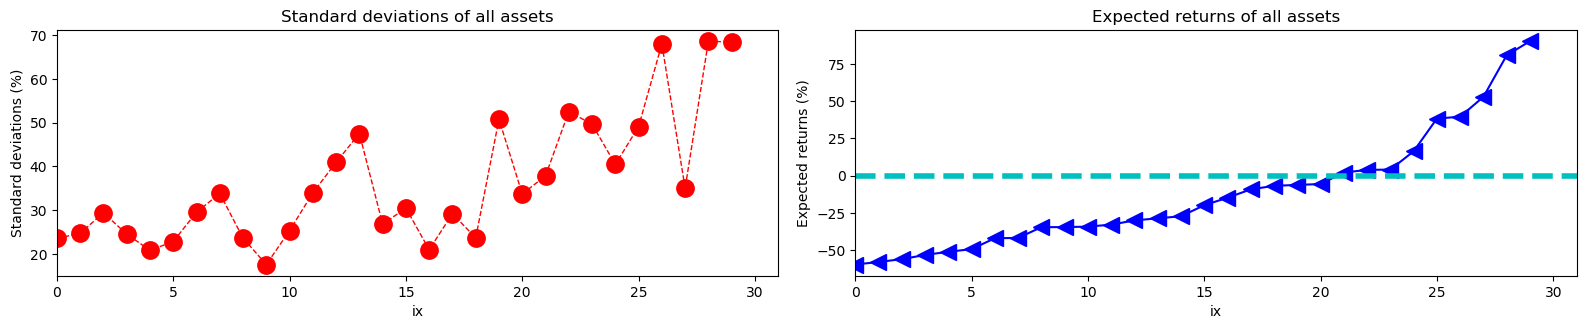

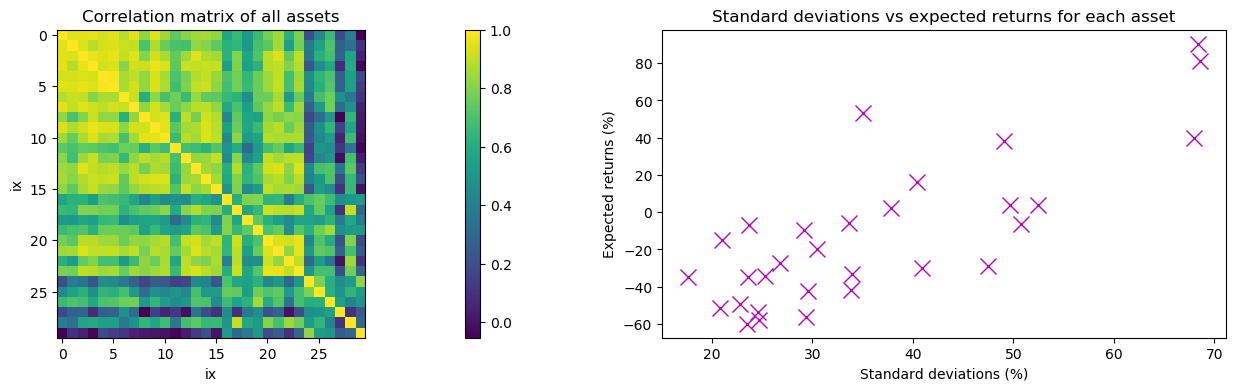

PyObject Text(0.5,1,'Standard deviations vs expected returns for each asset')

In [4]:
# Display the standard deviations, expected returns and their correlations of all 30 assets 

# Plot standard deviations or expected returns vs ix

fig = figure(figsize=(16,6));
ax1 = fig[:add_subplot](2,2,1); ax1[:plot](sqrt.(diag(Σ))[ix], linewidth=1, "r.--", markersize=25);
ylabel("Standard deviations (%)",); xlabel("ix"); xlim(0,31); title("Standard deviations of all assets")

ax2 = fig[:add_subplot](2,2,2); ax2[:plot](r[ix],"b<-", markersize=12); plot([0,31],[0,0],"c--", linewidth=4)
xlim(0,31); ylabel("Expected returns (%)"); xlabel("ix"); title("Expected returns of all assets")
tight_layout()

# plot correlation matrix of all 30 assets

fig = figure(figsize=(16,4));
ax3 = fig[:add_subplot](1,2,1); corr = diagm(diag(Σ).^(-1/2))*Σ*diagm(diag(Σ).^(-1/2))
imshow(corr[ix,ix]);colorbar();axis("image")
xlabel("ix"); ylabel("ix"); title("Correlation matrix of all assets")

# plot each asset individually

ax4 = fig[:add_subplot](1,2,2); plot(sqrt.(diag(Σ)), r, "mx", markersize=12)
xlabel("Standard deviations (%)"); ylabel("Expected returns (%)");
title("Standard deviations vs expected returns for each asset")

From the above 4 plots, our data shows:

1. From the plot of "Standard deviations of all assets", we see that the standard deviations of all assets range from 15 to 70. For assets with "ix" from 1 to 20, the standard deviations do not change a lot. However, for assets with "ix" from 20 to 30, the standard deviations for each asset show an increasing trend as "ix" increases. Since "ix" is the indices of crypto-currencies which are sorted in ascending order by their expected returns, and standard deviations show the risks, we can say, the more expected return of a crypto-currency is, the more risks there will be for investing in that asset.

2. The "Expected returns of all assets" plot tells the expected returns of each asset, indexed by "ix". Since "ix" is the indices of assets which are sorted in ascending order by their expected returns, we can see the expected returns are increasing as "ix" increases.

3. The bottom-left plot shows the correlation between each two assets. As we can see, the pairs of crypto-currencies with both indices in range of 1 to 15 are highly correlated, while other pairs of crypto-currencies are not that highly-related. Furthermore, the smaller the indices of the pairs, the more related these pairs are.

4. From the bottom-right plot, we can also see the fact that higher standard deviations (risks) correspond to higher expected returns. Most assets with standard deviations below 50% have negative expected returns. The assets with highest expected returns are those with highest risks.

#### 4.B. Optimal porfolio examples

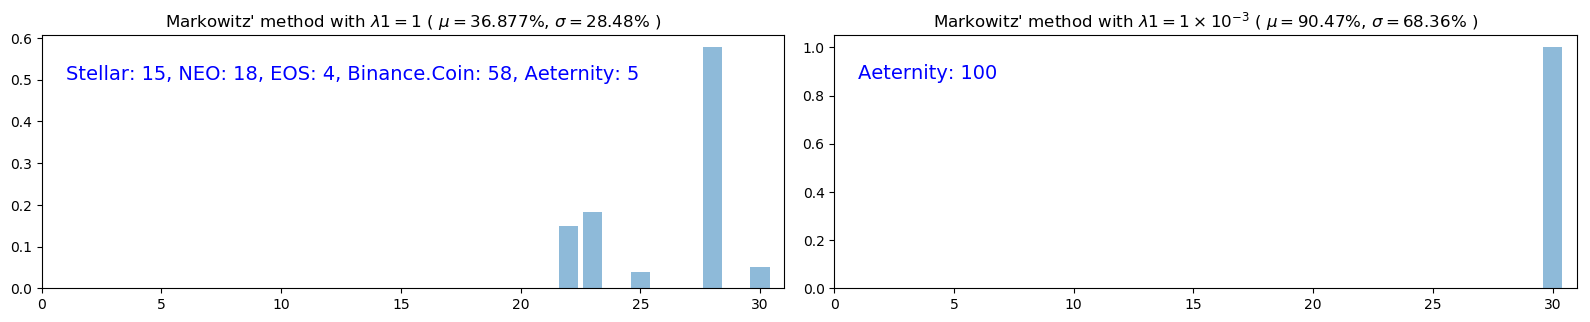

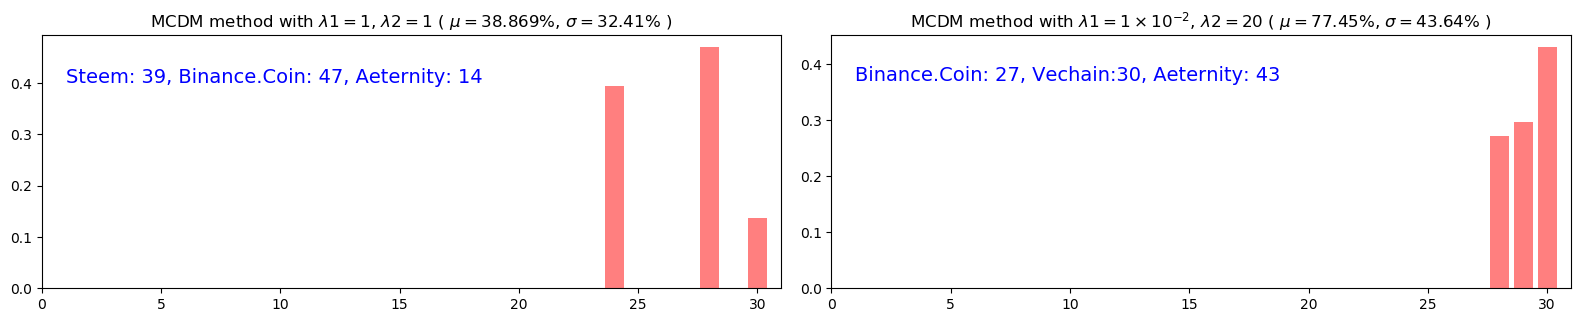

Academic license - for non-commercial use only


In [5]:
# 1) Examples of model based on classic Markowitz' approach

λ11=1;
fig = figure(figsize=(16,6));
(xsol1,ix1,ret1,std1,rnk1)=solve_opt(λ11, 0)
ax5 = fig[:add_subplot](2,2,1);
xlim(0,31); bar(1:30,xsol1[ix], align="center",alpha=0.5)
title(string("Markowitz' method with \$\\lambda1=1\$"," ( \$\\mu=\$",
        round(ret1,3), "%, \$\\sigma=\$", round(std1,2), "% )"));
text(1, 0.5, "Stellar: 15, NEO: 18, EOS: 4, Binance.Coin: 58, Aeternity: 5", size=14, color="b")

λ12=1e-3;
(xsol2,ix2,ret2,std2,rnk2)=solve_opt(λ12, 0)
ax6 = fig[:add_subplot](2,2,2);
xlim(0,31); bar(1:30,xsol2[ix], align="center",alpha=0.5)
title(string("Markowitz' method with \$\\lambda1=1\\times10^\{-3\}\$"," ( \$\\mu=\$", round(ret2,3),
        "%, \$\\sigma=\$", round(std2,2), "% )"));
text(1, 0.87, "Aeternity: 100", size=14, color="b")
tight_layout()


# 2) Examples of model based on MCDM approach

λ1_1=1; λ2_1=1000
fig = figure(figsize=(16,6));
(xsol3,ix3,ret3,std3,rnk3)=solve_opt(λ1_1, λ2_1)
ax5 = fig[:add_subplot](2,2,1);
xlim(0,31); bar(1:30,xsol3[ix], color="r",align="center",alpha=0.5)
title(string("MCDM method with \$\\lambda1=1\$, \$\\lambda2=1\$"," ( \$\\mu=\$",
        round(ret3,3), "%, \$\\sigma=\$", round(std3,2), "% )"));
text(1, 0.4, "Steem: 39, Binance.Coin: 47, Aeternity: 14", size=14, color="b")

λ1_2=1e-2; λ2_2=1
(xsol4,ix4,ret4,std4,rnk4)=solve_opt(λ1_2, λ2_2)
ax6 = fig[:add_subplot](2,2,2);
xlim(0,31); bar(1:30,xsol4[ix], color="r",align="center",alpha=0.5)
title(string("MCDM method with \$\\lambda1=1\\times10^\{-2\}\$, \$\\lambda2=20\$"," ( \$\\mu=\$", round(ret4,3),
        "%, \$\\sigma=\$", round(std4,2), "% )"));
text(1, 0.37, "Binance.Coin: 27, Vechain:30, Aeternity: 43", size=14, color="b")
tight_layout()

# portfolio(λ11,0); portfolio(λ12,0); portfolio(λ1_1,λ2_1); portfolio(λ1_2,λ2_2)

The top two plots are the optimal portfolios solved by the classic Markowitz' approach. The top-left plot has $λ_1 = 1$ and $λ_2 = 0$; while the top-right plot has $λ_1 = 1 \times 10^{-3}$ and $λ_2 = 0$. From these two plots, we can see with $λ_1 = 1 \times 10^{-3}$ compared with $λ_1 = 1$, the model takes less emphasis on the risks. Hence, it arbitrarily take the one with highest expected return, since risks are too small in this model. However, with $λ_1 = 1$ (the top-left plot), since the crypto-currency with ix = 30 is too risky, the best portfolio has more other crypto-currencies, which are both profitable and relatively-low risky.

The bottom two plots are the optimal portfolios solved by the MCDM approach. As we can see, after adding some investment criteria, the optimal solutions are quite different from the top two. This is basically because the model has to evaluate the investment criteria for each crypto-currency. If the number (investment criteria) for some crypto-currency is too low, that will affect the overall objective value. Hence, we can see with different weights on investment criteria, the optimal portfolios solved are quite different.

#### 4.C. Tradeoff curves

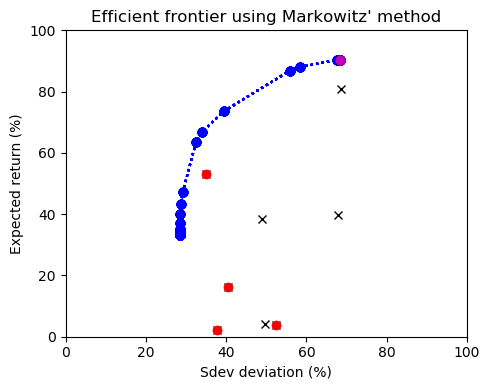

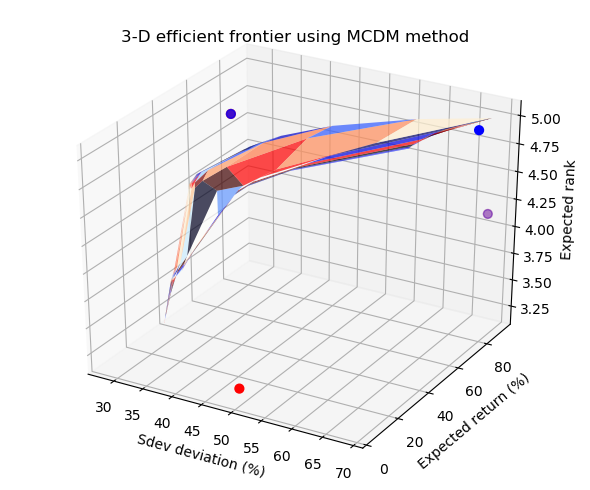

In [6]:
# Plot tradeoff curve Markowitz' approach

fig = figure(figsize=(5,4));
(xsol_1, ret_1, sdev_1, rnk_1) = find_tradeoff(0)
plot(sdev_1,ret_1,"bo:")
plot(sqrt.(diag(Σ)), r, "kx", markersize=6)
plot(sqrt.(diag(Σ))[ix1], r[ix1], "r.", markersize=12)  
plot(sqrt.(diag(Σ))[ix2], r[ix2], "m.", markersize=12) 
xlabel("Sdev deviation (%)"); ylabel("Expected return (%)"); title("Efficient frontier using Markowitz' method")
axis([0,100,0,100]);
tight_layout()

# Plot tradeoff curve using MCDM method

fig = figure(figsize=(6,5));
(xsol_2, ret_2, sdev_2, rnk_2) = find_tradeoff(1)
surf(sdev_2,ret_2,rnk_2, cmap=ColorMap("flag"), alpha=0.7)

scatter3D(sqrt.(diag(Σ))[ix3], r[ix3], rnk_2[ix3], color=:red, marker="o", s=40)
scatter3D(sqrt.(diag(Σ))[ix4], r[ix4], rnk_2[ix4], color=:blue, s=40)
xlabel("Sdev deviation (%)"); ylabel("Expected return (%)"); zlabel("Expected rank"); 
title("3-D efficient frontier using MCDM method")
tight_layout()

The above two plots show the tradeoff curves for Markowitz' model and MCDM model, respectively.

1. In the upper plot above, the blue line shows the tradeoff curve of Markowitz' model. Basically, the tradeoff curve shows the optimal protfolio with highest total returns at given risks when the regularization parameter is set from $λ_1 = 1 \times 10^{-4}$ to $λ_1 = 1 \times 10^{4}$. Data points of all assets and examples of Markowitz method with $λ_1 = 1$ and $λ_1 = 1 \times 10^{-3}$ are marked as "x", red dots and purple dots, respectively. 
2. The lower plot shows the 3-D tradeoff plots for MCDM model. The different colors denote different tradeoff planes. Hence, this tradeoff plot is composed of different connected planes. Examples using MCDM method are demonstrated in red and blue dots for the optimal portfolio combination given $λ_1 = 1, λ_2 = 1000$ and $λ_1 = 1\times 10^{-2}, λ_2 = 1$, respectively.

#### 4.D. Total expected return comparasion

Optimal portfolios at given risks from Markowitz' approach and MCDM approach are calculated and the corresponding expected returns are compared in the two models.

For the model based on classic Markowitz' approach, we can get the optimal portfolio table shown below.

In [4]:
# Optimal portfolios at given risks using Markowitz' approach

println("i", '\t', "Risk", '\t', "Optimal Portfolio", '\t', "Expected Return")
for i in 1:30
    println(i, '\t', Int(round(sdev_1[i,1])), '\t', find(xsol_1[i,1,:] .> 1e-4), "\t\t\t", Int(round(ret_1[i,1])))
end

|Risk| Optimal Portfolio                                |Expected Return|
|----|--------------------------------------------------|---------------|
| 68 | [Aeternity] or [Vechain, Aeternity]              |    90         |
| 58 | [Vechain, Aeternity]                             |    88         |
| 56 | [Vechain, Aeternity]                             |    87         |
| 39 | [Binance.Coin, Vechain, Aeternity]               |    74         |
| 34 | [Binance.Coin, Vechain, Aeternity]               |    67         |
| 32 | [Binance.Coin, Vechain, Aeternity]               |    63         |
| 29 | [Binance.Coin, Vechain, NEO, Aeternity]          |    47         |
| 28 | [Binance.Coin, Stellar, NEO, EOS, Aeternity]     |    37         |

The table above is a summary of the optimal portfolios using Markowitz' approach, along with the corresponding expected returns at given risks. In the table, the assets between each pair of square brackets give an optimal portfolio, and the weights for each asset are not shown here.

For example, when the risk is 68, we have optimal portfolios which is composed of 100% of Aeternity, or we can have two assets in our portfolio: Vechain, Aeternity. The weights are not given, but we know they are both significant (with weights greater than 0.01%).

(In future follow-up projects, we can implement more calculations in determining the exact weights of each assets within an optimal porfolio)

Optimal portfolios using MCDM method are displayed as follows:

In [62]:
# Optimal portfolios at given risks using MCDM approach

println("i", '\t', "j", '\t', "Risk", '\t', "Optimal Portfolio", '\t', "Expected Return")
for i in 1:30
    for j in 1:30
        # println([i, j], '\t', sdev_2[i,j], '\t', find(xsol_2[i,j,:] .> 1e-4), '\t', ret_2[i,j])
        println(i, '\t', j, '\t', Int(round(sdev_2[i,j])), '\t', find(xsol_2[i,j,:] .> 1e-4), "\t\t\t", Int(round(ret_2[i,j])))
    end
end

|Risk| Optimal Portfolio                |Expected Return|
|----|----------------------------------|----|
| 68 | [Aeternity] or [Vechain, Aeternity]                  | 90 |
| 65 | [Vechain, Aeternity]                          | 90 |
| 61 | [Vechain, Aeternity]                          | 89 |
| 60 | [Vechain, Aeternity]                          | 88 |
| 59 | [Aeternity, Tether]                         | 78 |
| 58 | [Vechain, Aeternity]                          | 88 |
| 57 | [Vechain, Aeternity]                          | 87 |
| 56 | [Vechain, Aeternity]                          | 87 |
| 52 | [Binance.Coin, Vechain, Aeternity]                       | 82 |
| 50 | [Aeternity, Tether, Steem]                     | 60 |
| 45 | [Binance.Coin, Vechain, Aeternity]                       | 78 |
| 42 | [Binance.Coin, Vechain, Aeternity]                       | 76 |
| 40 | [Binance.Coin, Vechain, Aeternity]                       | 74 |
| 39 | [Binance.Coin, Vechain, Aeternity]                       | 74 |
| 38 | [Binance.Coin, Vechain, Aeternity]                       | 71 |
| 35 | [Binance.Coin, Vechain, Aeternity]                       | 68 |
| 34 | [Binance.Coin, Vechain, Aeternity]                       | 67 |
| 33 | [Binance.Coin, Vechain, Aeternity]                       | 65 |
| 32 | [Binance.Coin, Vechain, Aeternity]                       | 63 |
| 31 | [Binance.Coin, Vechain, NEO, Aeternity]                   | 58 |
| 30 | [Binance.Coin, Vechain, NEO, Aeternity]                   | 50 |
| 29 | [Binance.Coin, Vechain, NEO, Aeternity] or [Binance.Coin, Stellar, NEO, Aeternity] | 47 |
| 28 | [Binance.Coin, Stellar, NEO, EOS, Aeternity]               | 38 |

The table above is a summary of the optimal portfolios using MCDM method, along with the corresponding expected returns at given risks. The way to interpret the table is the same as the Markowitz' model. For some given risks, there may be more than one optimal portfolio.

By comparing the two models, we can see for a fixed range of risks, the MCDM method gives more detailed optimal portfolios table compared with the Markowitz' model. The table for MCDM method has more specific risks covered. This is basically because the MCDM model is a more complex method compared with Markowitz' model, the results in Markowitz' model are also covered in the table of MCDM model. Apart from the results of Markowitz' model, it has covered many other cases, hence more specific risks are covered.

Furthermore, since the MCDM model takes an investment criteria into account, the expected return for an optimal portfolio cannot be worse than the optimal portfolio of Markowitz' model given a fixed risk.

In this case, we can say the MCDM method is more comprehensive.

#### 4.E. Accuracy of two models

We want to see if the two traditinal models are suitable for the cryptocurrency. To explore this question, we'll use the previous 6 months data to dicide the portfolio we'll buy in the 7th month. Then, we'll calculate the optimization portfpolio in 7th month with real data in the 7th month. The comparison is done between two portfolios. The expected value and covariance matrix for previous 6 months and the 7th month are recalculated. The degree of difference of two porfolios is evaluated by sum of squares of weight difference for 6 month and last month.

In [19]:
seed = 1
srand(seed)
rank = rand(1:10, 30)
function portfolio(r,sigma,flag)
    
    m = Model(solver = GurobiSolver(OutputFlag=0))
    lamda1 = 1
    if flag == 1
        lamda2 = 0
        elseif flag == 2
            lamda2 = 20
        end
    @variable(m,x[1:30] >= 0)
    @objective(m, Min, -dot(x,r) + lamda1*dot(x,sigma*x) - lamda2*dot(rank,x))
    @constraint(m,sum(x) == 1)
    @constraint(m,ret[i in 1:30], x[i]*r[i] >=0)
    solve(m)
    result = getvalue(x)
    index = find(result .<= 1e-4)
    result[index] = 0
    df = DataFrame()
    df[:CoinName] = ["Bitcoin", "Litecoin","Ripple", "Ethereum", "Binance Coin", "Tron", "Stellar","Vechain", "Cardano", "NEO","EOS", "IOTA", "Aeternity", "Tether", "Decred", "Ethereum Classic","Maker", "DigiByte", "Bytecoin", "Tezos(Pre-Launch)", "Steem", "OmiseGo", "Monero", "Zcash","ICON", "Dogecoin","Bitcoin Cash", "Bitshares","Lisk","Dash"]
    df[:investment] = result
   # showall(df)
    return result
end


portfolio (generic function with 2 methods)

**Markowitz Modern Portfolio Theory (MPT)**

In [26]:
r1 = readcsv("6month_mean.csv")[:]
sigma1 = readcsv("6month_cov.csv") 
result1 = portfolio(r1,sigma1,1)
println("previous 6 months: ", result1)
r2 = readcsv("lastmonth_mean.csv")[:]
sigma2 = readcsv("lastmonth_cov.csv") 
result2 = portfolio(r2,sigma2,1)
println("last month: ", result2)
degree = sum((result1[i]-result2[i])^2 for i=1:30)
println("MPT degree of difference: ", degree )

Academic license - for non-commercial use only
previous 6 months: [0.0, 0.0, 0.0, 0.0, 0.530501, 0.0, 0.0488148, 0.0, 0.0, 0.293938, 0.0562845, 0.0, 0.0704612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Academic license - for non-commercial use only
last month: [0.0, 0.0, 0.0, 0.0, 0.141306, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.858694, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
MPT degree of difference: 0.8647351331002822


The degree of difference for MPT model is 0.865

**Multiple-criteria decision-making (MCDM)**

In [25]:
result3 = portfolio(r1,sigma1,2)
println(result3)
result4 = portfolio(r2,sigma2,2)
println(result4)
degree = sum((result3[i]-result4[i])^2 for i=1:30)
println("MCDM degree of difference: ", degree )

Academic license - for non-commercial use only
[0.0, 0.0, 0.0, 0.0, 0.548605, 0.0, 0.0695712, 0.0, 0.0, 0.285815, 0.0, 0.0, 0.0960084, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Academic license - for non-commercial use only
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
MCDM degree of difference: 1.2046989641816128


The degree of difference for MCDM model is 1.205

The accuracy is for both models are not ideal in our case. The reasons may lead to the situation is listed below.
1. The amount of data we used for calculation is not enough, so the result of model is not accurate.
1. The two models are too simplified to model digital currency behavior. There are some other aspects of the propblem is not taken into consideration.

### 5. Conclusion

Our project discusses models using Markowitz or MCDM methods to optimize maximum profit in different scenarios. Proving the proverb "High Risk, High return," our optimized portfolio helps to frame investment strategies in cryptocurrencies by every customer's preferred risk levels. The tadeoff curves demonstrate the optimal portfolo solutions at given risks. Optimizing portfolio relies on three important variables: expected returns, standard deviations(risks), and expected rank. For current crypto-currency market, there is no sofisticated criteria as the stock market to evaluate the investment potentials. Our project created a criteria by simulating random numbers to all assets in order to apply the MCDM method in portfolio optimization. The MCDM method demonstrates a better range of portfolio options and the corresponding expected returns. However, our data only contains the most recent 7 monthes. The ideas using Markowitz or MCDM methods can be extended for more accurate predctions by a rolling basis using 3, 5, 10 year data to concretely implement trend analyses.

While this report calculates the maximum return of the diverse combinations of assets with only corresponding postive risk levels, customized to only untargeted profit-seeking investors, we can extend our follow-up project in the future to calculate the minimum time to reach a targeted return. This is conducted by calculating the negative risk levels to define risk as those outcomes that do not achieve the goal, or so called Sortino Ratio. Hence, once international regulations stabilize,  we can ultimately determine the maximum Sharpe Ratio with both positive and negative total risks to fully determine how well an cryptocurrency/equity investment is performing compared to a risk-free investment like U.S. treasuries, and essentially provide the bigger optimized portfolio for customers. To create such comparison plausible, we must build a portfolio with combination of publicly trading indices from distinct industries such as Apple, Facebook, ExxonMobil, and cryptocurrencies to precisely compare their performances with those of risk-free investments, especially under the cryptocurrency's currently unremittingly changing international regulations. Hence, our recommendation is to invest in cryptocurrency once regulations are uniformly stabilized globally!

### 6. References

1. Chuen, K., David, L. E. E., Guo, L., & Wang, Y. (2017). Cryptocurrency: A new investment opportunity? *The Journal of Alternative Investments, 20* (3), 16-40.

2. Pärlstrand, E., & Rydén, O. (2015). Explaining the market price of Bitcoin and other Cryptocurrencies with Statistical Analysis.

3. Ehrgott, M., Klamroth, K., & Schwehm, C. (2004). An MCDM approach to portfolio optimization. *European Journal of Operational Research*, 155(3), 752-770.

### 7. Appendix

#### 7.A. Crypto-currencies

| Index | CoinTypes |
|-------|-----------|
| 1  | Bitcoin |
| 2  | LiteCoin |
| 3  | Ripple |
| 4  | Ethereum |
| 5  | Binance.Coin |
| 6  | Tron |
| 7  | Stellar |
| 8  | Vechain |
| 9  | Cardano  |
| 10 | NEO |
| 11 | EOS |
| 12 | IOTA |
| 13 | Aeternity |
| 14 | Tether |
| 15 | Decred  |
| 16 | Ethereum.Classic |
| 17 | Maker |
| 18 | DigiByte |
| 19 | Bytecoin |
| 20 | Tezos.Pre.Launch. |
| 21 | Steem |
| 22 | OmiseGo |
| 23 | Monero |
| 24 | Zcash |
| 25 | ICON |
| 26 | Dogecoin |
| 27 | Bitcoin.Cash |
| 28 | Bitshares |
| 29 | Lisk |
| 30 | Dash |

#### 7.B. Optimal portfolios for examples of two models

In [9]:
portfolio(λ11,0); portfolio(λ12,0); portfolio(λ1_1,λ2_1); portfolio(λ1_2,λ2_2)

30×2 DataFrames.DataFrame
│ Row │ CoinName         │ investment │
├─────┼──────────────────┼────────────┤
│ 1   │ Bitcoin          │ 0.0        │
│ 2   │ Litecoin         │ 0.0        │
│ 3   │ Ripple           │ 0.0        │
│ 4   │ Ethereum         │ 0.0        │
│ 5   │ Binance Coin     │ 0.577431   │
│ 6   │ Tron             │ 0.0        │
│ 7   │ Stellar          │ 0.148387   │
│ 8   │ Vechain          │ 0.0        │
│ 9   │ Cardano          │ 0.0        │
│ 10  │ NEO              │ 0.183924   │
│ 11  │ EOS              │ 0.0392672  │
│ 12  │ IOTA             │ 0.0        │
│ 13  │ Aeternity        │ 0.0509911  │
│ 14  │ Ox               │ 0.0        │
│ 15  │ Decred           │ 0.0        │
│ 16  │ Ethereum Classic │ 0.0        │
│ 17  │ Maker            │ 0.0        │
│ 18  │ DigiByte         │ 0.0        │
│ 19  │ Bytecoin         │ 0.0        │
│ 20  │ Tezos            │ 0.0        │
│ 21  │ Steem            │ 0.0        │
│ 22  │ OmiseGo          │ 0.0        │
│ 23  │ Monero